**NAME :- KONKAL KAILASH VENKATESH**

**BATCH NO :- DS2312**

**PROJECT - LOAN APPLICATION STATUS PREDICTION**

In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # filter warnings
warnings.filterwarnings('ignore')

In [7]:
# import data

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 614
No. of columns 13


In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# As we have 13 columns let's sort columns by their datatypes 

data.columns.to_series().groupby(data.dtypes).groups

{int64: ['ApplicantIncome'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

* In the dataset we have 614 rows and 13 columns.


# Statistical Analysis

#### Before going for statistical exploration of data, first check integrity of data & missing values.

#### Data Integrity Check

In [12]:
data.duplicated().sum()

0

Datasets does not contains any duplicate entry.

# Missing vale check

<Axes: >

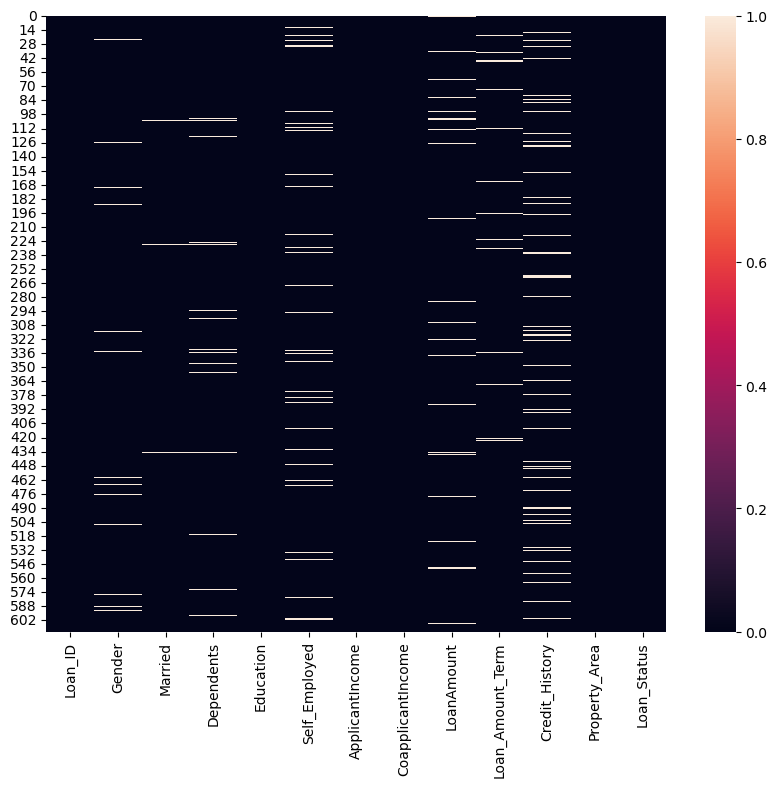

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())

In [14]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                   Missing_values  %Missing values
Credit_History                 50         8.143322
Self_Employed                  32         5.211726
LoanAmount                     22         3.583062
Dependents                     15         2.442997
Loan_Amount_Term               14         2.280130
Gender                         13         2.117264
Married                         3         0.488599
Loan_ID                         0         0.000000
Education                       0         0.000000
ApplicantIncome                 0         0.000000
CoapplicantIncome               0         0.000000
Property_Area                   0         0.000000
Loan_Status                     0         0.000000


* 7 out of 13 columns contains missing values.
* As small amount of data is missing so we use mean and mode to replace with NaN values.

#### Lets explore categorial features before missing value imputation.

# Start with Enlisting Value counts & sub categories of different categorial features available

In [16]:
category=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term',
          'Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(data[i].value_counts())
    print('*'*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
****************************************************************************************************
Married
Yes    398
No     213
Name: Married, dtype: int64
****************************************************************************************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************************************************************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************************************************************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************************************************************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0     

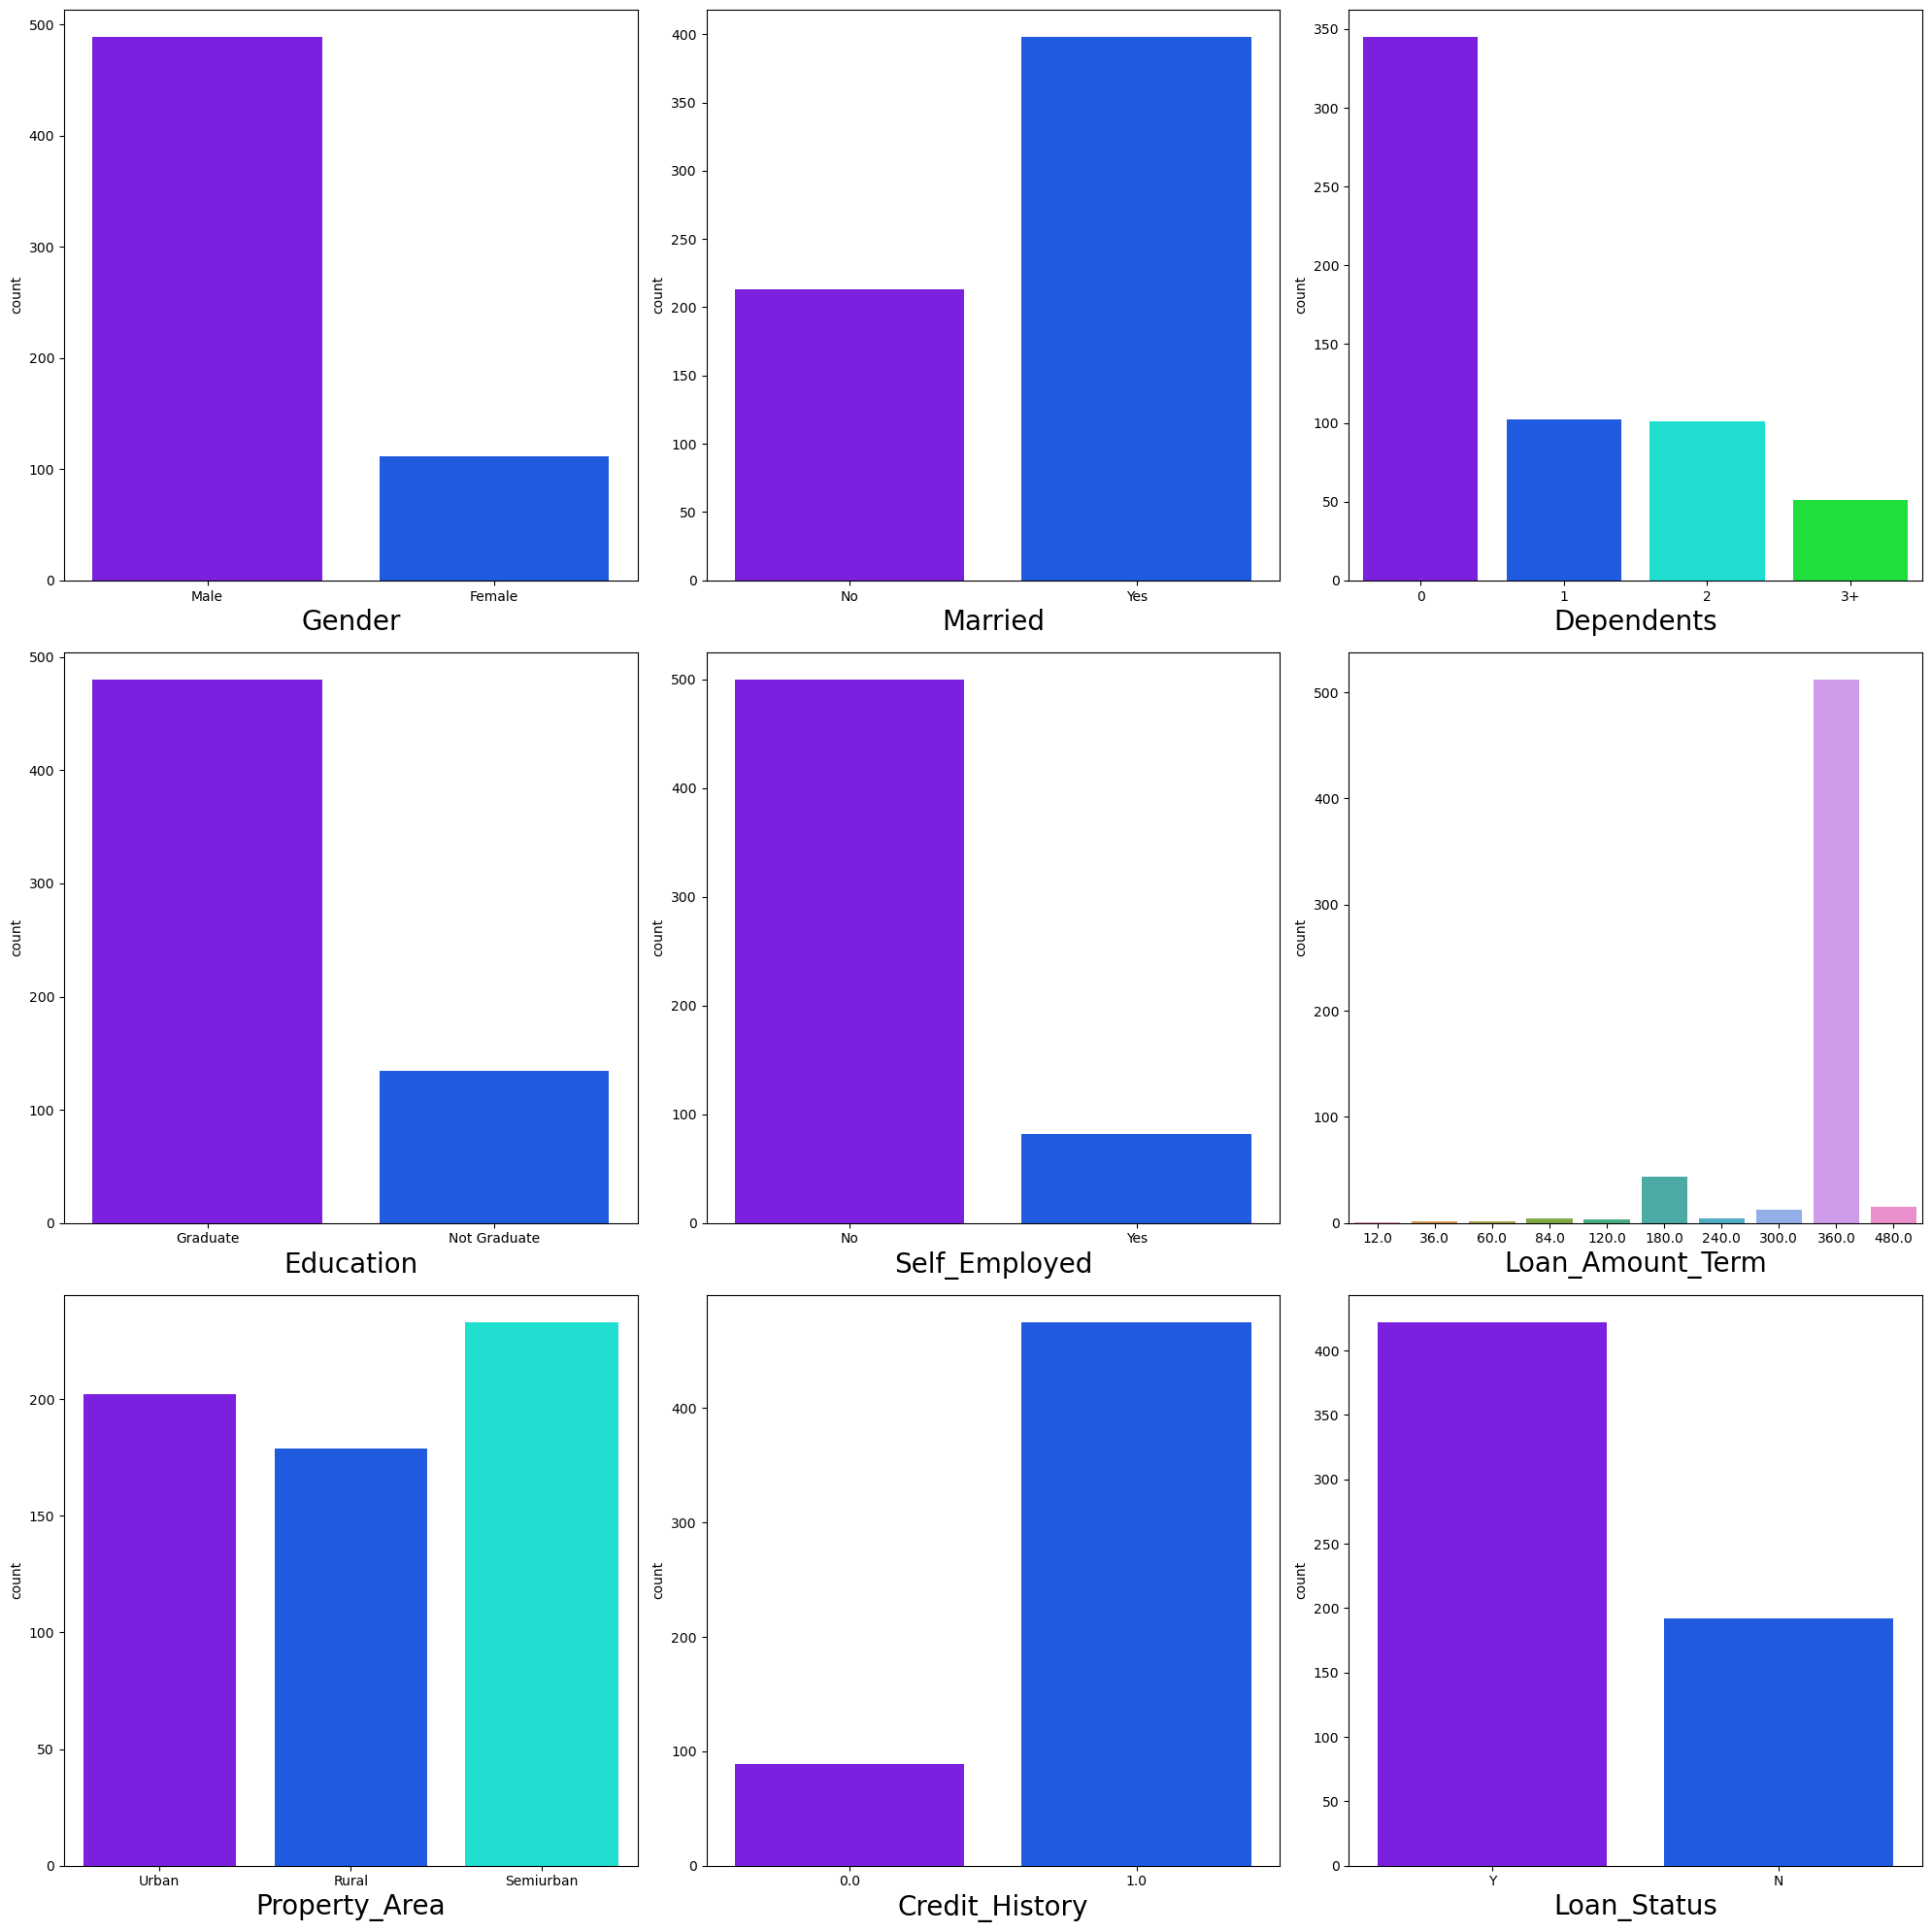

In [17]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor ='white')
plotnumber = 1
category=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term',
          'Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=i,data=data)
        plt.xlabel(i,fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From the above observation, we can say that

* Out of Total Loan application 80% applicants are males. we can explore loan amount for each gender applied and evalued wheather on the same basis loan is approved for each gender or not?
* Only 20% of applicants are self employeed. So it will intresting to gain insights on relation between Applicants income and loan approval for non self employeed category. we will look to find any benchmark range of income for loan approval. Another benchmark we will try to find is about loan requirement for these two categories.
* Nearly 70% are married and 75% of loan applicants are graduates.
* Almost 60% of the applicants have no dependents.
* Most of applicants comes from semi urbans areas, followed by urbans and rural areas.
* 80% peoples previously have credit history. Normally people having credit history are seen more important.
* Nearly 70% applicants gets loan approved.

### Let's check outliers for missing values Numerical variables having missing values by plotting boxplot.

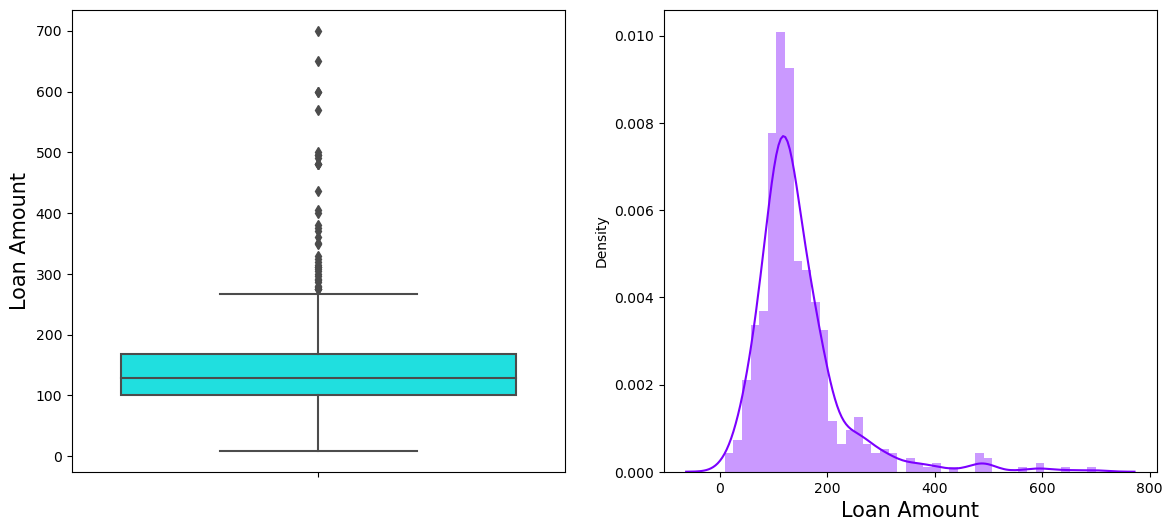

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = 'LoanAmount',data=data,color='cyan')
plt.ylabel('Loan Amount', fontsize = 15)
plt.subplot(1,2,2)
sns.distplot(data['LoanAmount'])
plt.xlabel('Loan Amount', fontsize = 15)
plt.show()

In [19]:
print('Mean of loan amount :',data['LoanAmount'].mean())
print('Median of loan amount :',data['LoanAmount'].median())

Mean of loan amount : 146.41216216216216
Median of loan amount : 128.0


From the above observation, we can say that

* The mean is greater than median loan amount.
* Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.

# Imputation of missing values

In [20]:
# imputation missing values with mode for categorial features
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

# imputation missing values for Numericals features
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

# Missing values after imputation

In [21]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                   Missing_values  %Missing values
Loan_ID                         0              0.0
Gender                          0              0.0
Married                         0              0.0
Dependents                      0              0.0
Education                       0              0.0
Self_Employed                   0              0.0
ApplicantIncome                 0              0.0
CoapplicantIncome               0              0.0
LoanAmount                      0              0.0
Loan_Amount_Term                0              0.0
Credit_History                  0              0.0
Property_Area                   0              0.0
Loan_Status                     0              0.0


#### Hence we can see that there are no missing Values present in the dataset.

# Statistical Matrix

<Axes: >

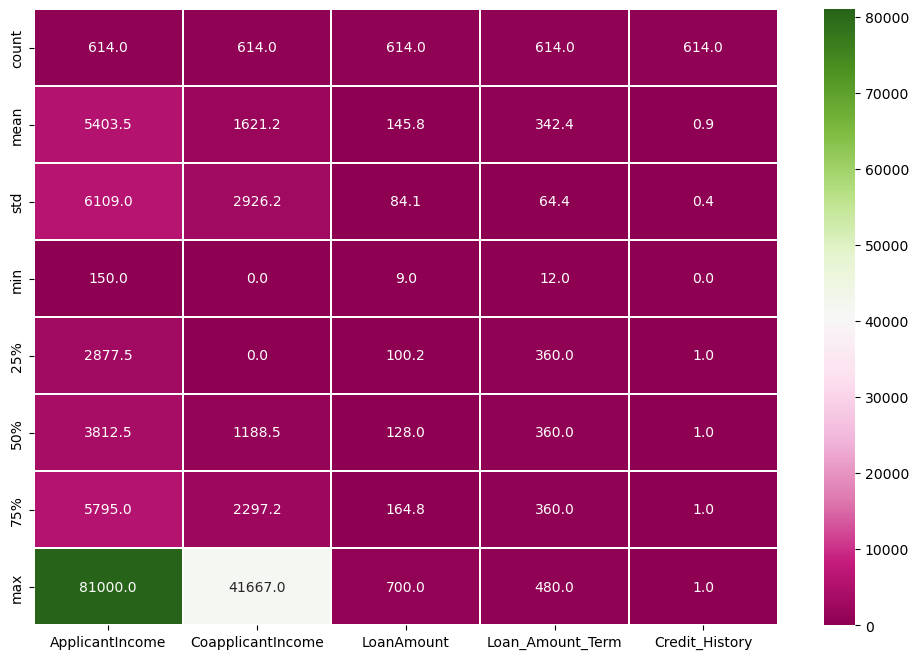

In [22]:
# visualizing the statistical of the columns using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(data.describe(),linewidths = 0.1, fmt = '0.1f',annot = True, cmap='PiYG')

In [23]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


From the above observation, we can say that

* In Applicant Income & Coapplicant income Std deviationvalue is greater than median. So data is spread and skewed.
* Taking 75% and Max rows into consideration we can surely say that outliers exits in Applicant income, Coapplicant income, loan amount.
* Minimum Tenure for loan is 12 months and Maximum loan tenure is 480 months.
* Minimum applicant income is 150 and Maximum applicant income is 81000.

#### Let's dive into exploration of target and inpendence features.

# Target Variables

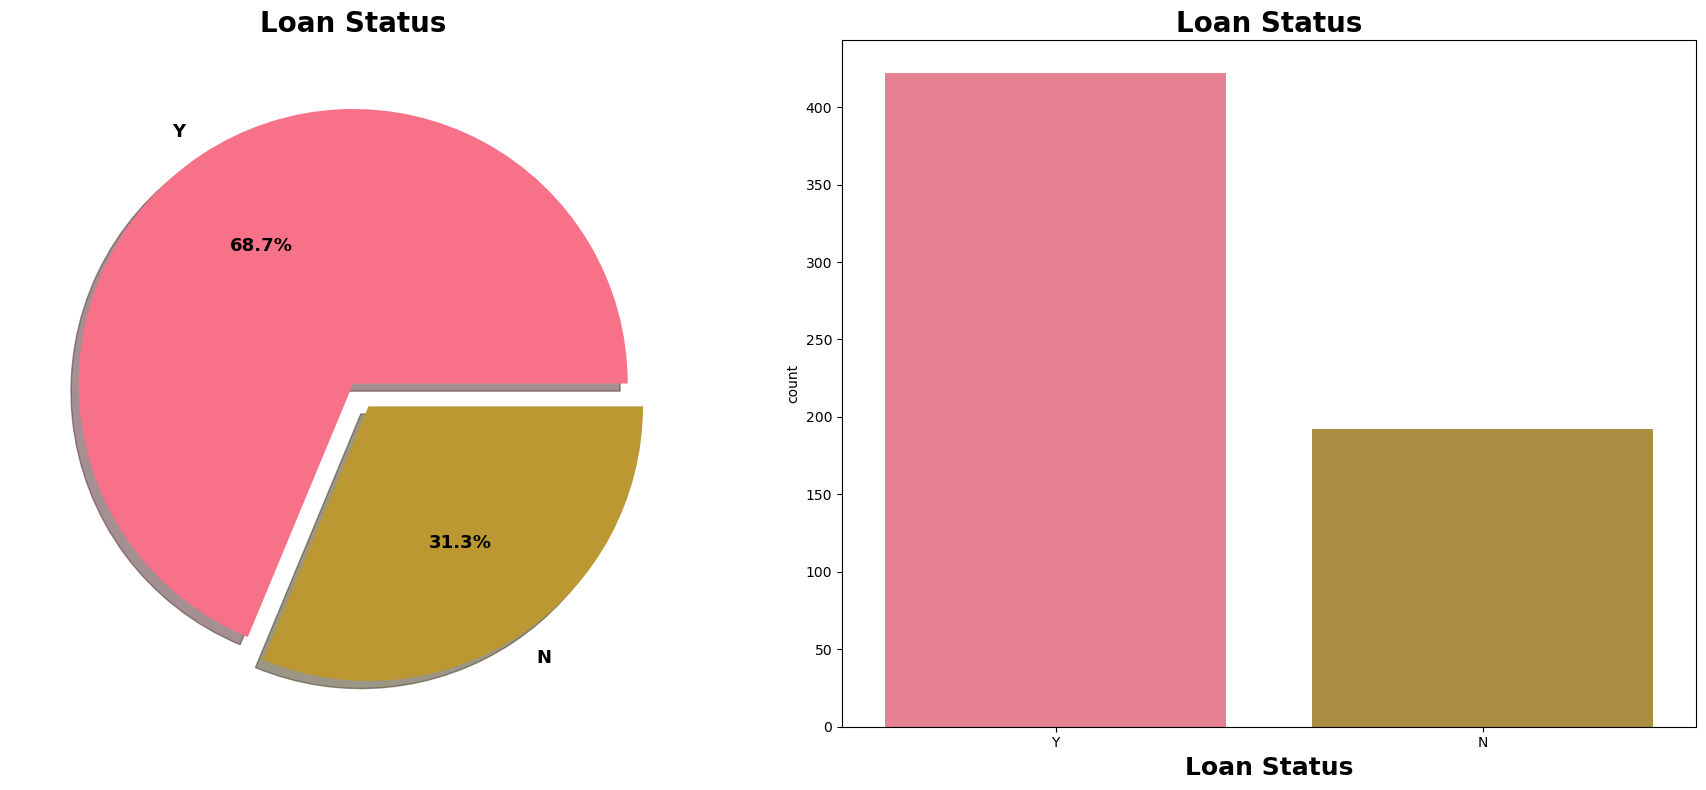

In [24]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Loan_Status', data=data, ax=ax[1])
ax[1].set_title("Loan Status", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Loan Status", fontsize=18, fontweight='bold')
plt.show()

From the above observation we can say that

* 68.7% Applicants gets loan approval.
* We can see that dataset is imbalaced is nature.

# Gender Vs Loan Status

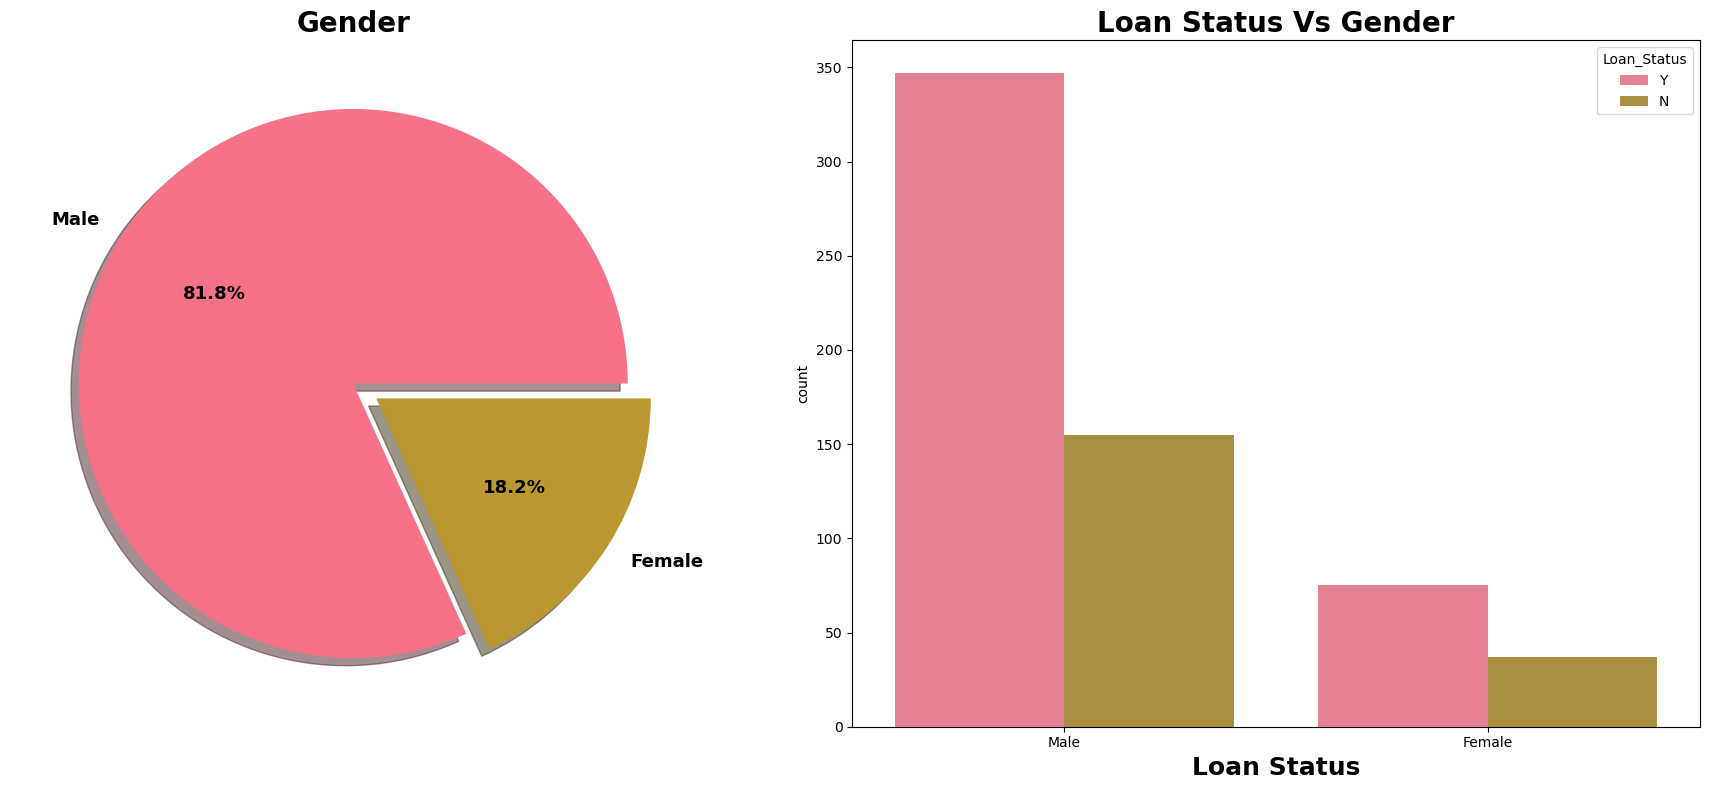

In [26]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Gender', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Gender', hue='Loan_Status',data=data, ax=ax[1])
ax[1].set_title("Loan Status Vs Gender", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Loan Status", fontsize=18, fontweight='bold')
plt.show()

In [27]:
pd.crosstab(data['Gender'],data['Loan_Status'], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


From the above observation we can say that

* 81.8% Applicants are Male.
* Irrespective Gender 65% Applicant from each gender gets loan approval. It means that gender doesnot play any role loan approval.No Discrimation on name of Gender Done.

# Married Vs Loan Status

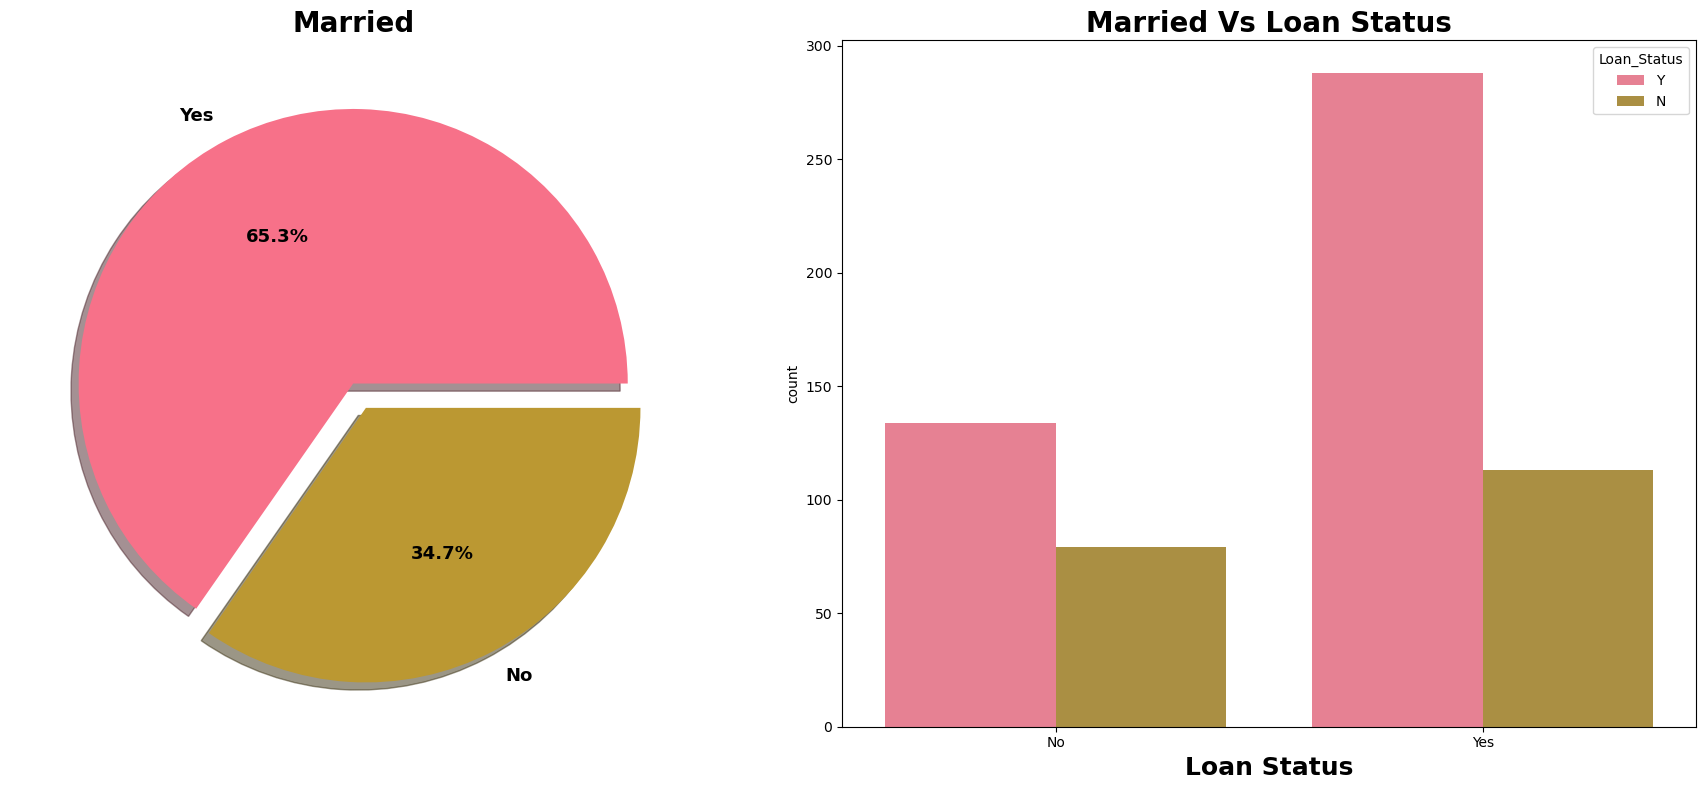

In [28]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Married', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Married', hue='Loan_Status',data=data, ax=ax[1])
ax[1].set_title("Married Vs Loan Status", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Loan Status", fontsize=18, fontweight='bold')
plt.show()

In [29]:
pd.crosstab([data['Gender'],data['Married']],[data.Loan_Status], margins=True).style.background_gradient(cmap='summer_r')

From the above observation we can say that

* 65.3% loan applicants are married. We can see from countplot that married people have more possibility of getting loan approval.

#### But here comes interesting observation from crosstab.

* Unmarried Women are more chances of getting loan approval compared to married women.We will try to find which factor actually play deciding role here like education,employeement or income.
* Married Men are more chance of loan approval.

# Let check how numbers dependents play here.

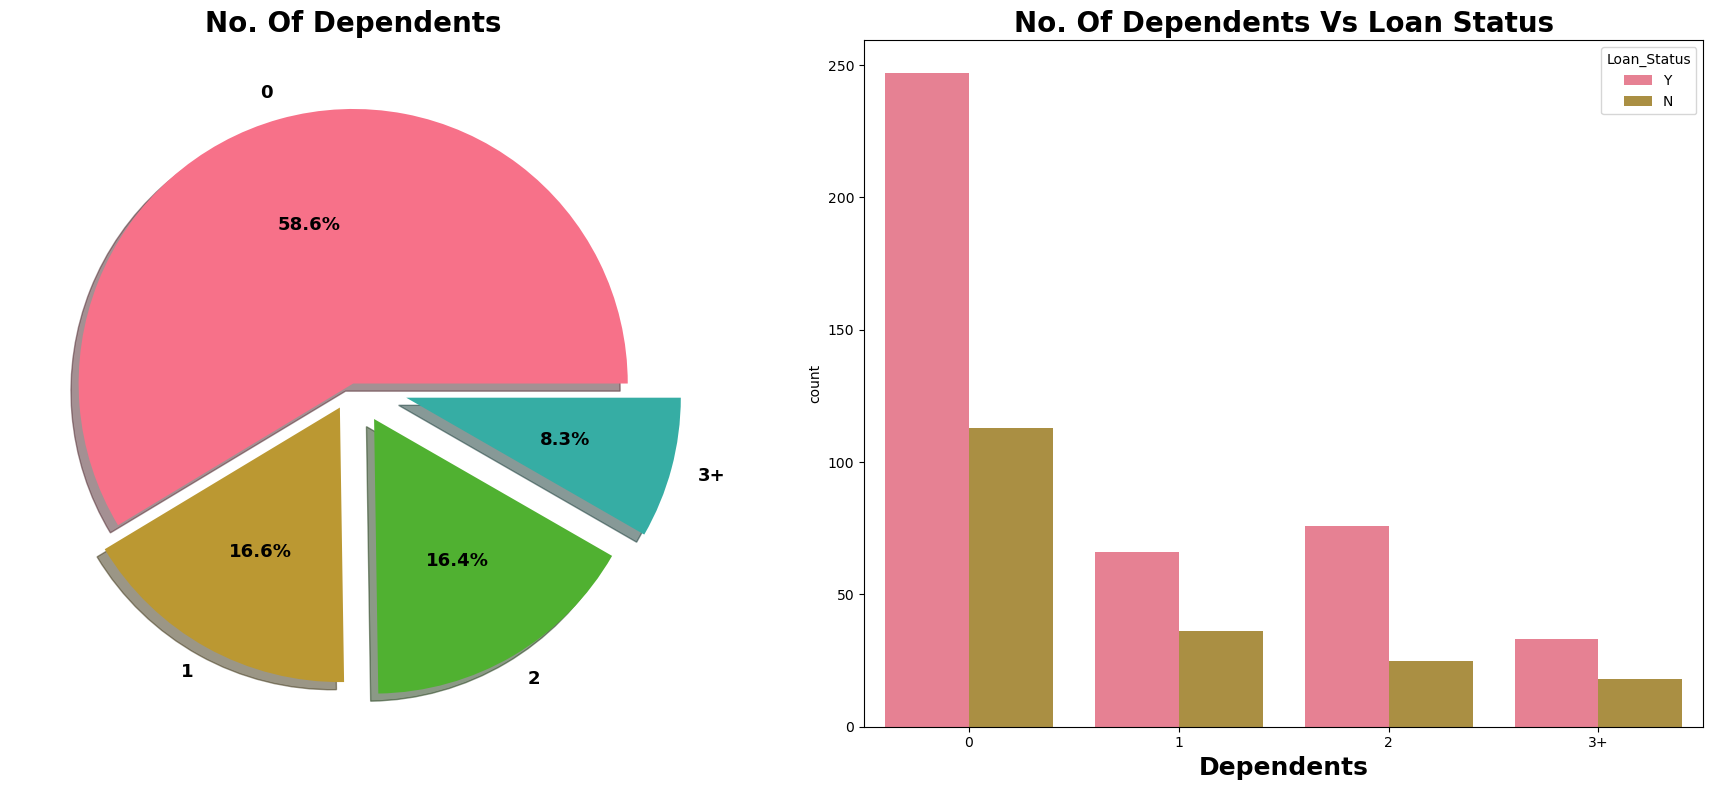

In [30]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('No. Of Dependents', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents', hue='Loan_Status',data=data, ax=ax[1])
ax[1].set_title("No. Of Dependents Vs Loan Status", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Dependents", fontsize=18, fontweight='bold')
plt.show()

In [31]:
pd.crosstab([data['Dependents']],[data.Loan_Status,data['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [32]:
pd.crosstab([data['Dependents'],data['Gender']],[data.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

From the above observation we can say that

* 58.6% Applicants have no dependent on them .33% Applicants have either 1 or 2 dependents. it will interesting check wheather with increase in numbers dependents their is increase in requirement loan amount.
* Female having zero dependents have more chances to get loan.
* For male Maximum loan apporval comes with 0 dependents followed by 2 dependents.

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Education Vs Loan Status

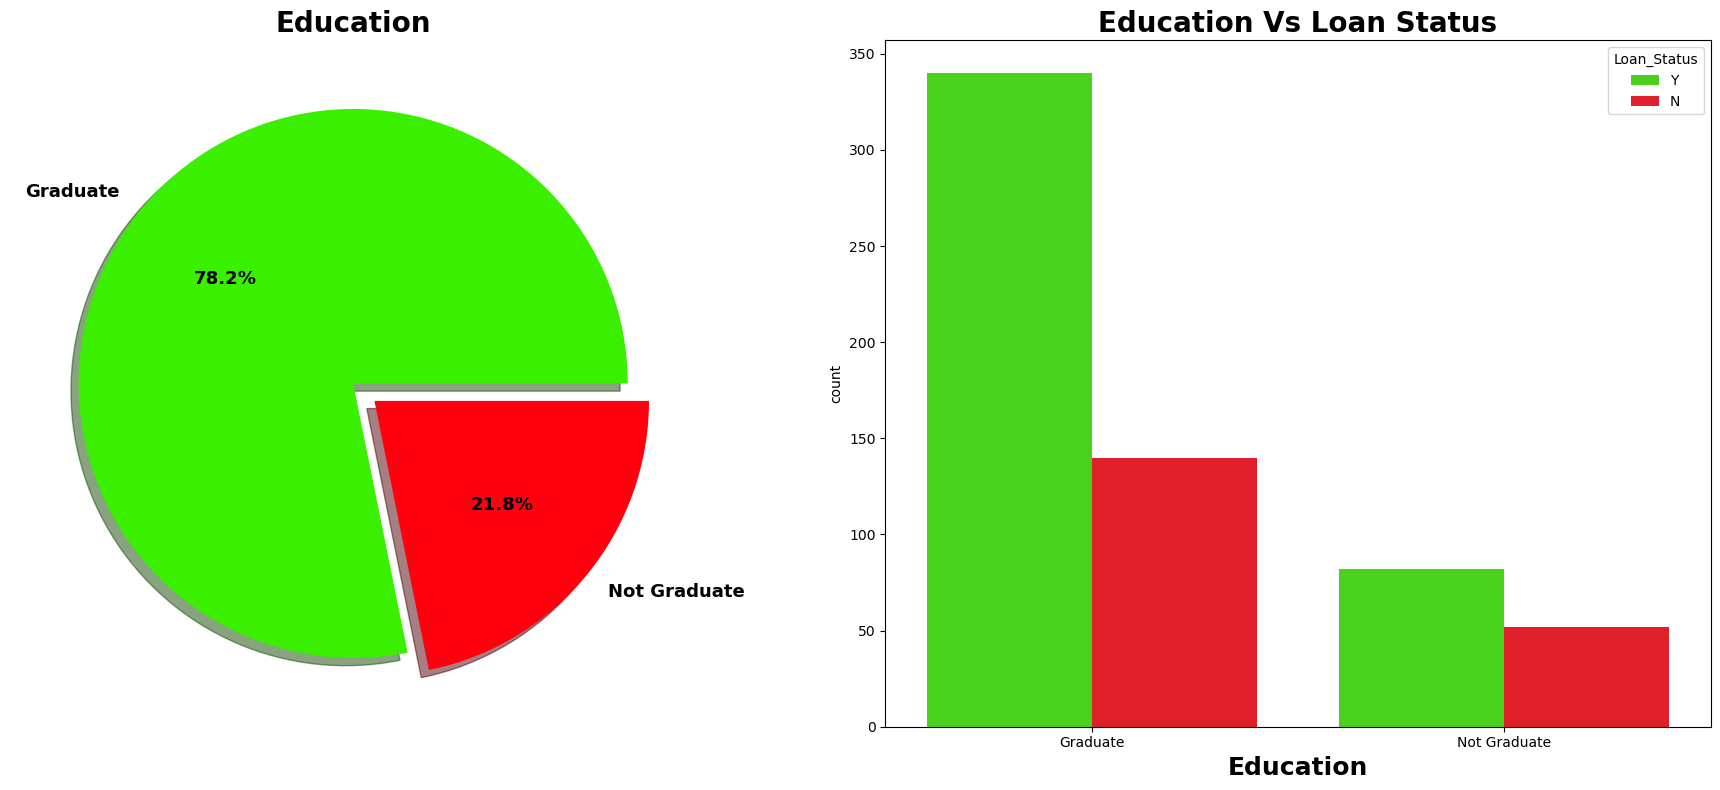

In [34]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('prism')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Education', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Education', hue='Loan_Status',data=data, ax=ax[1])
ax[1].set_title("Education Vs Loan Status", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Education", fontsize=18, fontweight='bold')
plt.show()

In [35]:
pd.crosstab([data['Education'],data['Gender']],[data.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

Graduate applicants are more likely to get loan approval irrespective gender.

In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encoding Categorial Data

In [38]:
#using label encoder on target variables

category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    data[i]=le.fit_transform(data[i])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature Selection and Engineering

#### Outlier Detection and Removal

In [39]:
Numerical = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

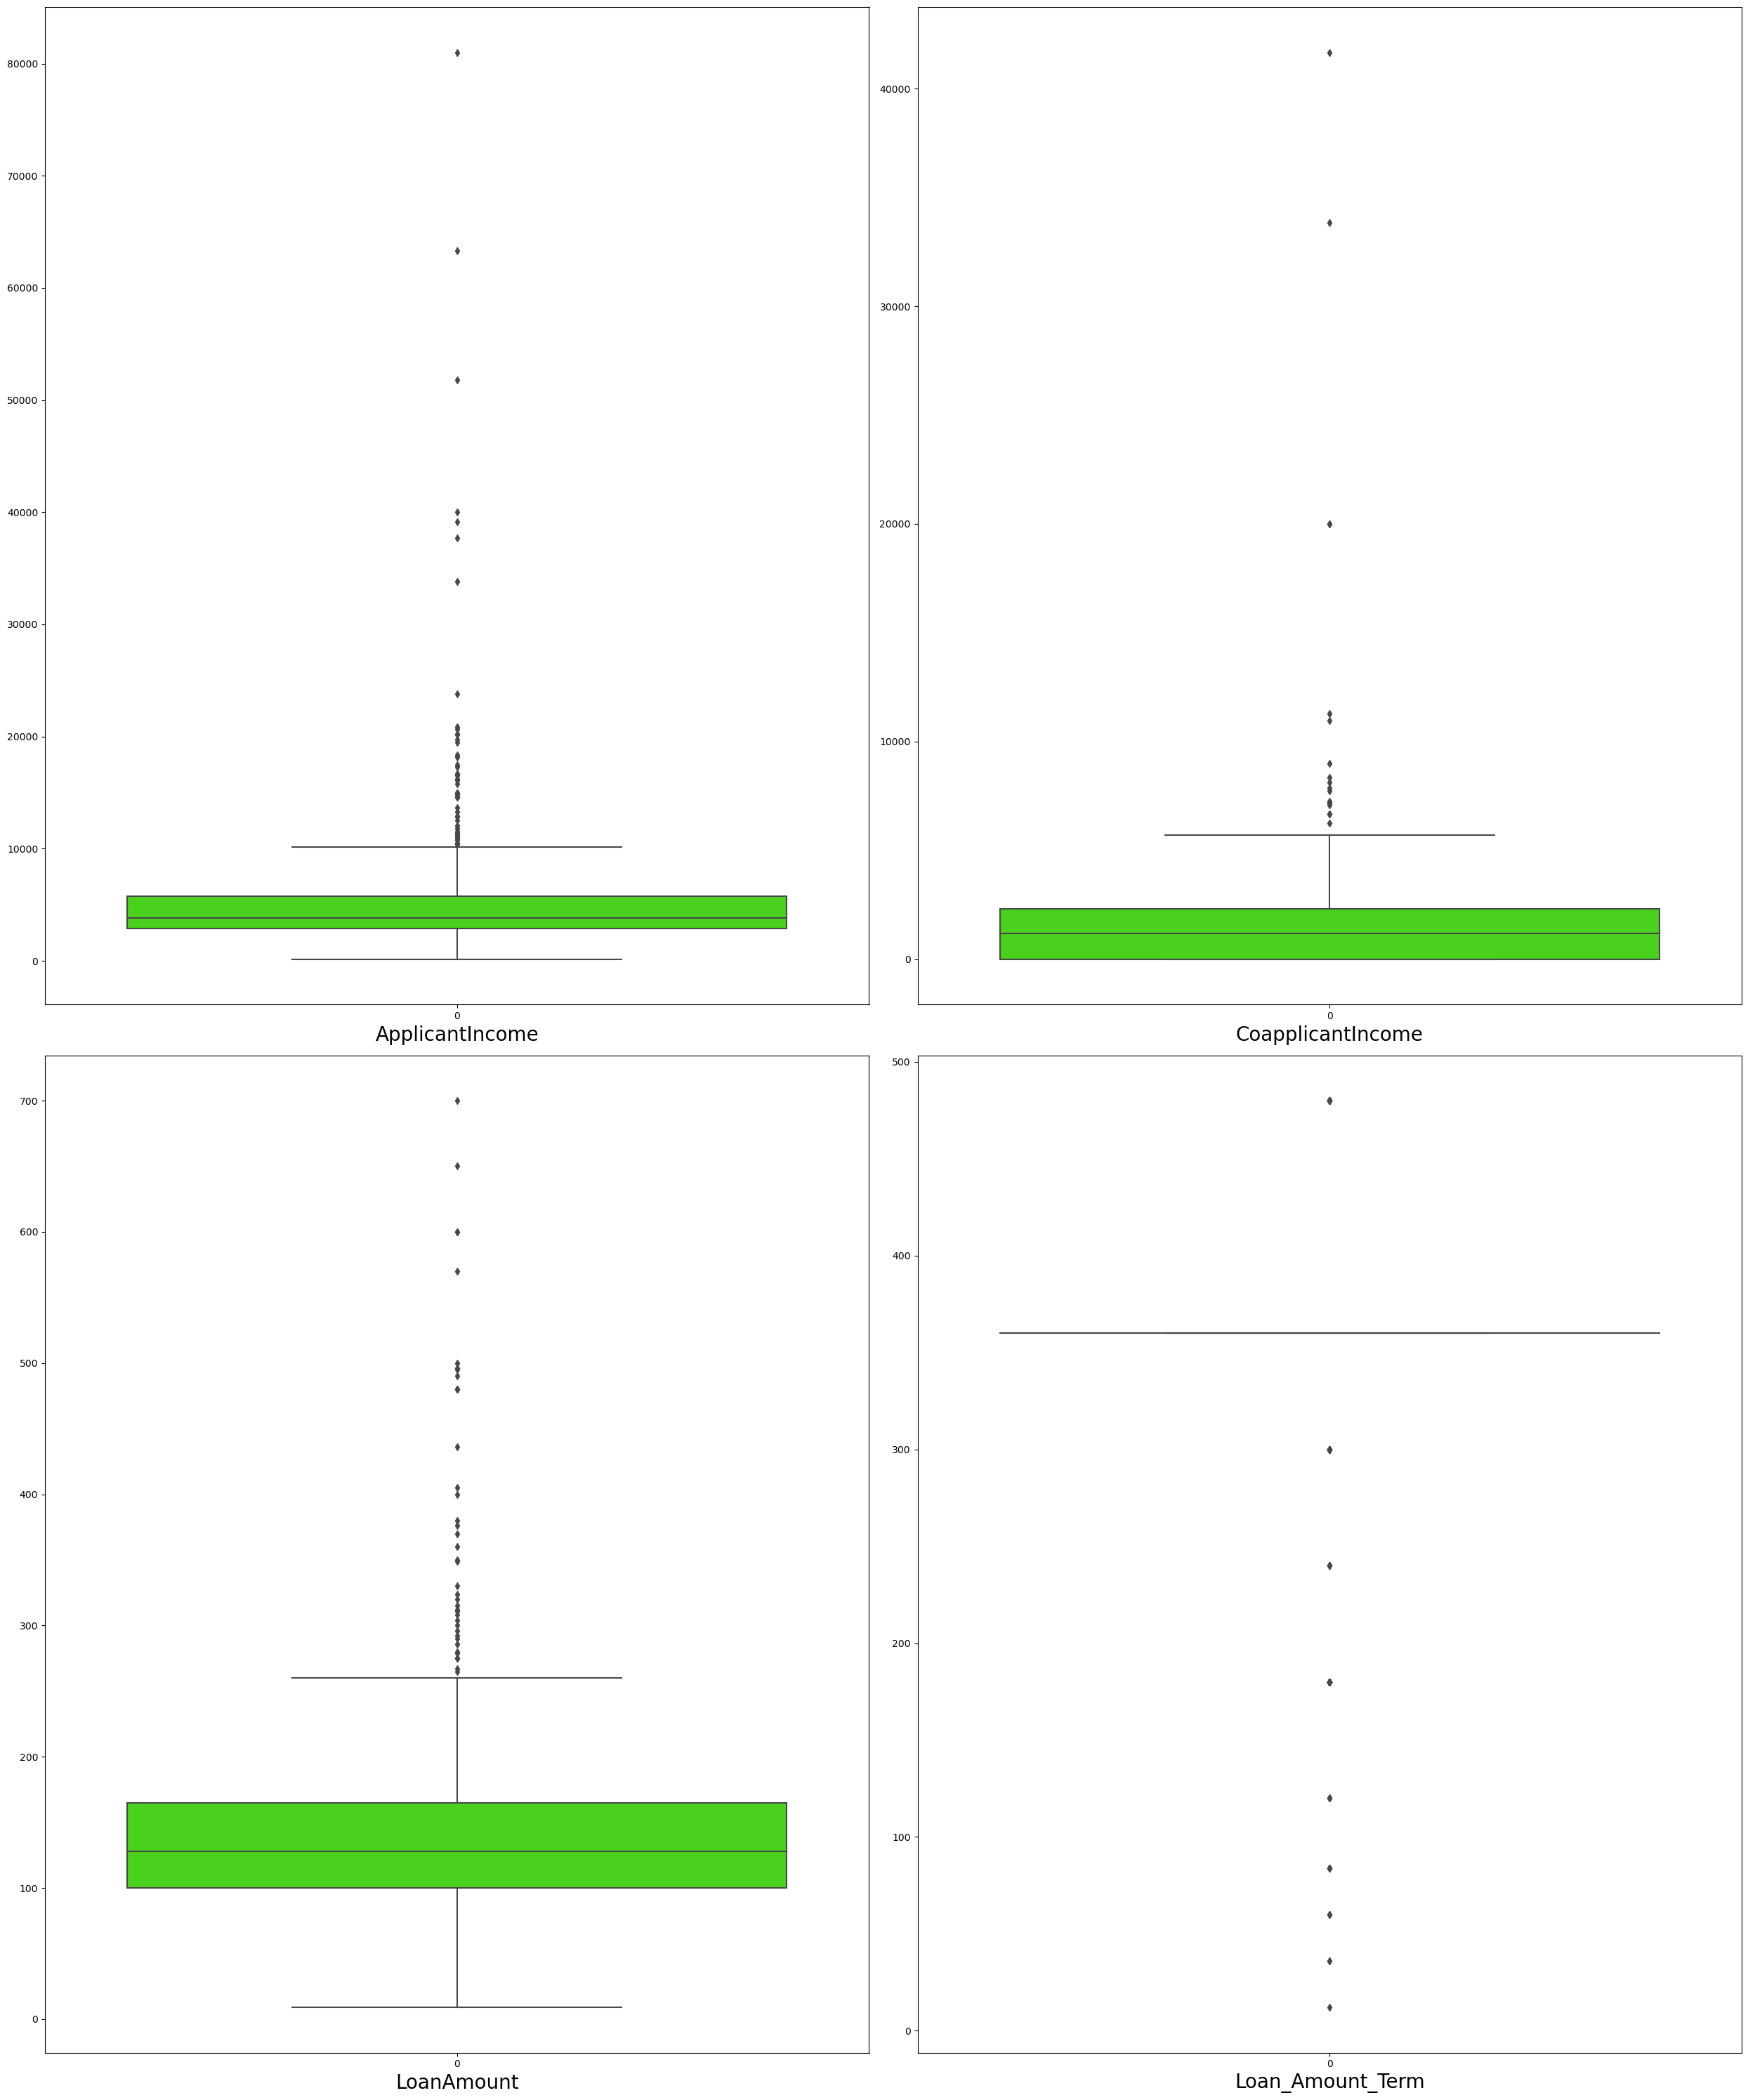

In [40]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Numerical:
    if plotnumber <=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

#### From the above boxplot we can see that outliers are present in the dataset.

In [41]:
#Dropping unnecessary columns

data.drop(['Loan_ID'],axis = 1, inplace=True)

In [42]:
data['Dependents'] = data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [43]:
data['Dependents'] = pd.to_numeric(data['Dependents'])

#### Z-Score

In [44]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]
print("Shape of the dataframe before removing outliers: ",data.shape)
print("Shape of the dataframe after removing outliers: ",df.shape)

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)


In [45]:
print("Percentage Data Loss",((614-577)/614)*100,'%')

Percentage Data Loss 6.026058631921824 %


In [46]:
data = df.copy()

# Skewness of features

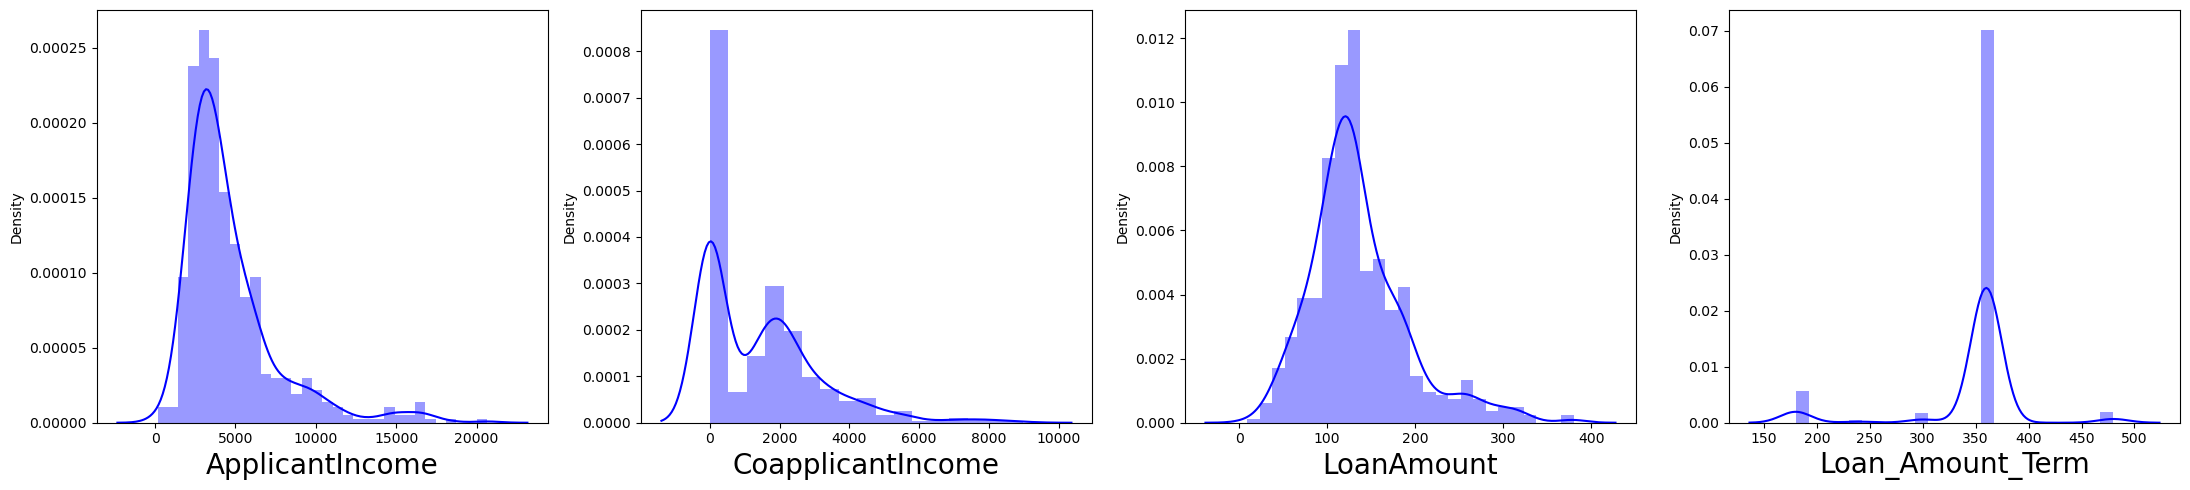

In [47]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(data[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [48]:
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

From the above observation we can see that

* Out of all above features 'ApplicantIncome','CoapplicantIncome','LoanAmount' are skewed which are numerical features.
* Other features are categorial in nature so skewness is nothing to do with these remaining feature. We will ignore them.
* We will yeo-johnson transformation mehtod.

In [49]:
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


# Checking skewness after using yeo-johnson method

In [50]:
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Correlation

In [51]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


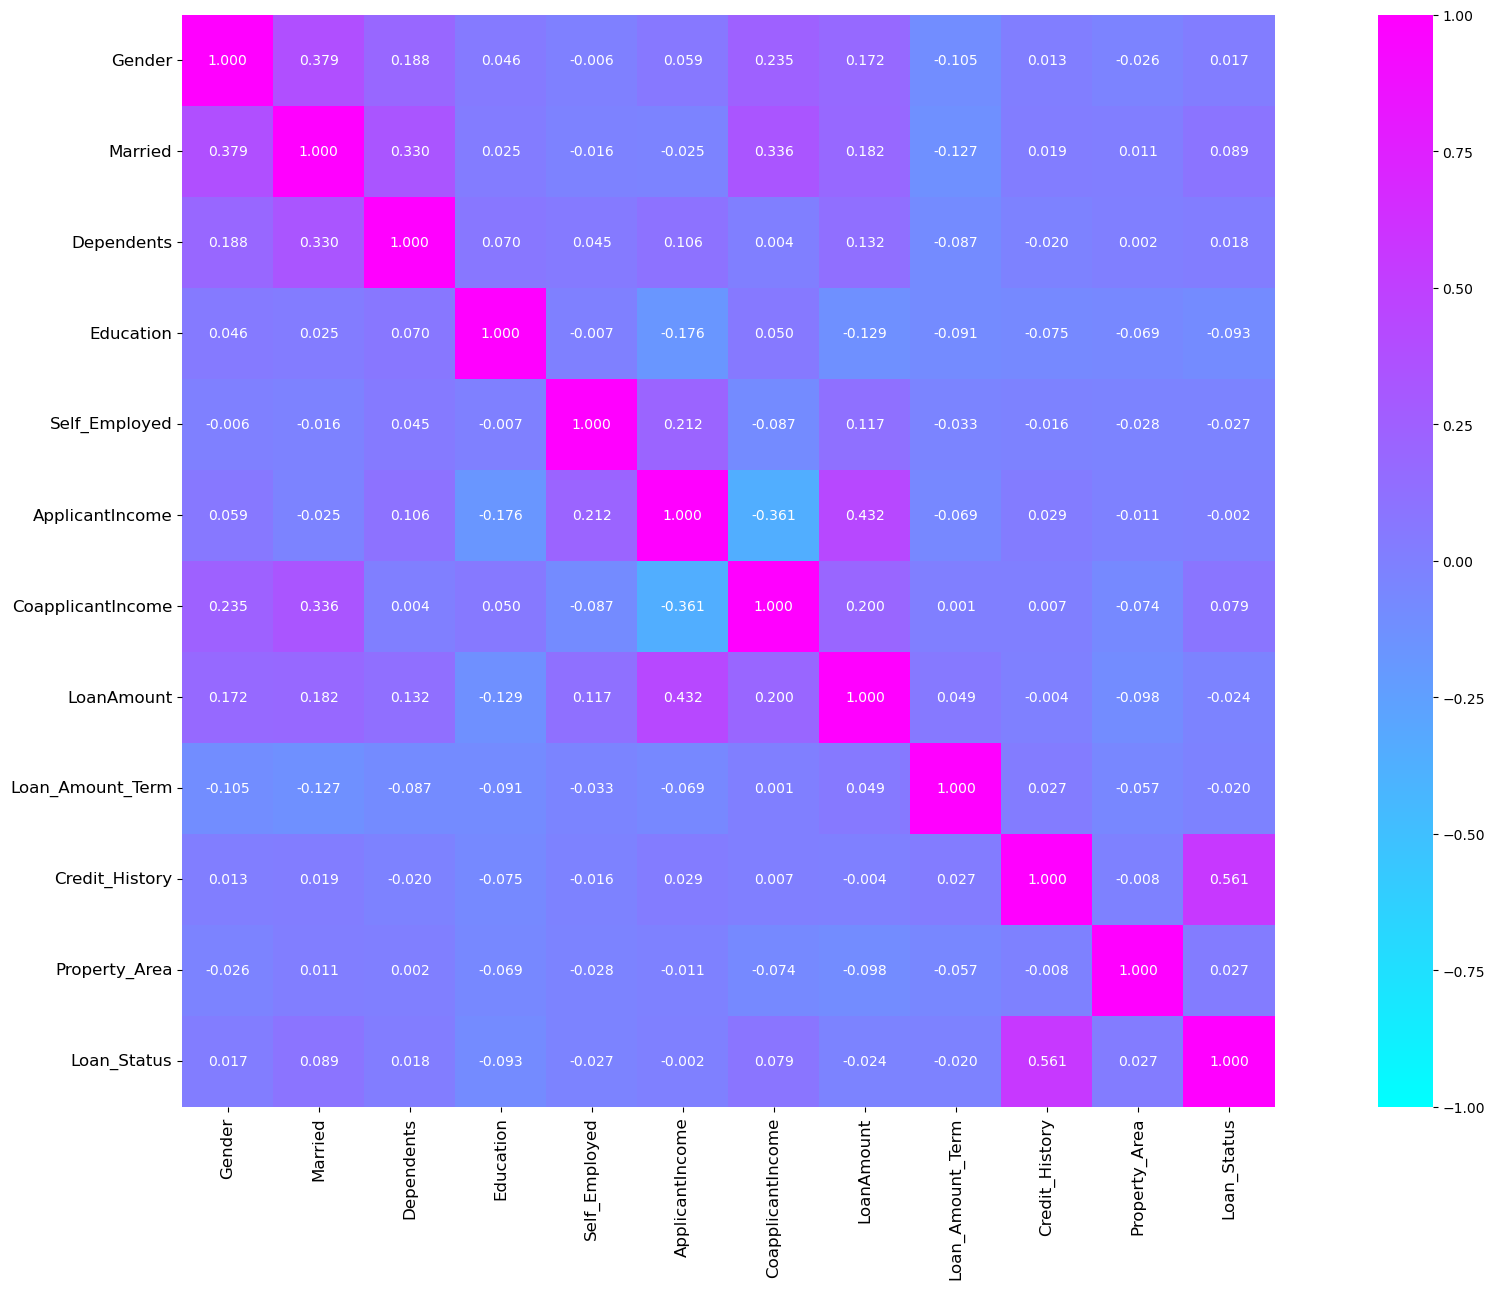

In [52]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(),vmin=-1, vmax=1,annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap = "cool")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

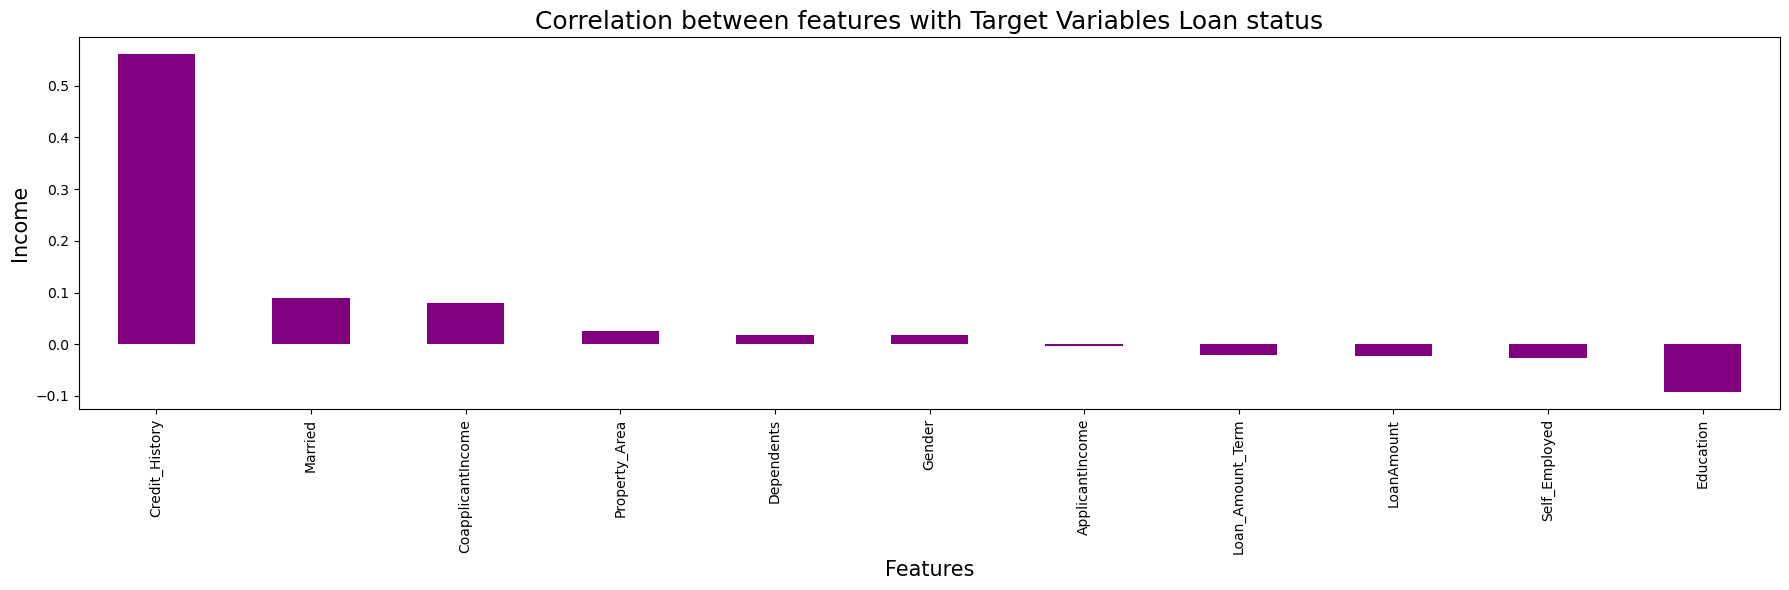

In [53]:
plt.figure(figsize=(18,6))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize = 15)
plt.title('Correlation between features with Target Variables Loan status', fontsize = 18)
plt.show()

#### Most of features are poorly or moderately correlated with target variable expect Credit History.

* Maximum correlation of 0.561 exits between Credit History and Loan Status.

### Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['Features']=data.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


#### All features VIF is within permissible limit of 10 so no need to worry About Multicollinearity.

## Balancing Imbalanced target Features

In [55]:
data.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

#### As target variable is imbalanced in nature we will need to balance target variable.

# Balacing using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
# spliting data in target and dependent features

x = data.drop(['Loan_Status'],axis = 1)
y = data['Loan_Status']

In [58]:
# oversampling using SMOTE Techniques

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [59]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now, we will resloved all class imbalanced problems and all the categorial have same data ensuring that the ML model does not get biased towords one category.

# Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Machine Learning and Model building

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3, random_state=99)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (557, 11)
Training target vector : (557,)
Test feature matrix size : (239, 11)
Test target vector size : (239,)


# Finding Best Random Rate

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,250):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = 0.3, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.8410041841004184 on Random_state 189


# Logistic Regression Evaluation

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3,random_state=78)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.8158995815899581
Confusion Matrix Of Logistic Regression :  [[ 73  37]
 [  7 122]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.91      0.66      0.77       110
           1       0.77      0.95      0.85       129

    accuracy                           0.82       239
   macro avg       0.84      0.80      0.81       239
weighted avg       0.83      0.82      0.81       239



# Cross Validation Score

In [65]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.68125    0.70440252 0.79874214 0.73584906 0.75471698]
Mean CVS Score :  0.73499213836478
Std Deviation :  0.04068859466836365


# Apply Other ML Models

In [66]:
models =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('*******************************************************************************************************************')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7824267782426778


Confusion Matrix 
 [[ 76  34]
 [ 18 111]]


Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.69      0.75       110
           1       0.77      0.86      0.81       129

    accuracy                           0.78       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.78      0.78       239



*******************************************************************************************************************
Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7907949790794979


Confusion Matrix 
 [[93 17]
 [33 96]]


Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       110
           1       0.85      0.74      0.79       129

    accuracy                           0.79     

# Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('*******************************************************************************************************************')



Cross Validation Score SVC() is
Score [0.5125     0.50943396 0.5408805  0.50314465 0.51572327]
Mean Score : 0.5163364779874213
Std Deviation 0.012955097057643066


*******************************************************************************************************************


Cross Validation Score DecisionTreeClassifier() is
Score [0.70625    0.74213836 0.77987421 0.74842767 0.81132075]
Mean Score : 0.7576022012578616
Std Deviation 0.03561481801792706


*******************************************************************************************************************


Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.70625    0.71069182 0.7672956  0.72955975 0.76100629]
Mean Score : 0.7349606918238993
Std Deviation 0.02516494083956024


*******************************************************************************************************************


Cross Validation Score RandomForestClassifier() is
Score [0.76875    0.77987421 0.82389937 0.85534591 0.

# Hyper-Parameter Tunning using GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param = [{'n_estimators':[5,10,15,25,50,100],
         'criterion':['gini','entropy'],
         'max_depth':[5,10,20,40,50,60],
         'max_features':['auto','log2'],
          'bootstrap':[True]}]

In [70]:
gc = GridSearchCV(RandomForestClassifier(),param,verbose=10)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/144] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.705 total time=   0.0s
[CV 2/5; 1/144] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/144] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.705 total time=   0.0s
[CV 3/5; 1/144] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/144] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.775 total time=   0.0s
[CV 4/5; 1/144] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/144] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.694 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 40, 50, 60],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 10, 15, 25, 50, 100]}],
             verbose=10)

In [72]:
gc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 100}

In [73]:
final = RandomForestClassifier(bootstrap = True ,criterion= 'entropy', max_depth = 60, max_features = 'log2', n_estimators = 100)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8577405857740585


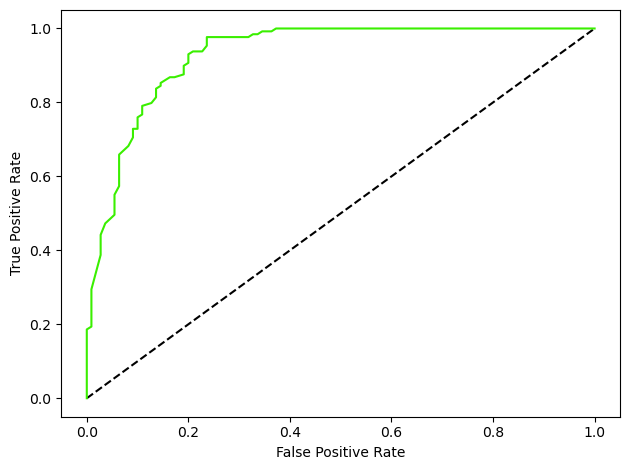

AUC SCORE 0.8534883720930232


In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = final.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(y_test,final.predict(x_test))
print("AUC SCORE", auc_score)

# Predict the Final Model

In [75]:
#Prediction

prediction = final.predict(x_test)

In [76]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1


# Saving the Model

In [77]:
import joblib
joblib.dump(final,"Loan Application Status Prediction")

['Loan Application Status Prediction']